In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#load in airbnb data
airbnb = pd.read_csv("dataset/listings.csv")
airbnb

,id,neighbourhood,room_type,accommodates,bathrooms,bedrooms,beds,price
0,1.318800e+04,Riley Park,Entire home/apt,4,1.0,0.0,2.0,14
1,1.335800e+04,Downtown,Entire home/apt,2,1.0,1.0,1.0,20
2,1.349000e+04,Kensington-Cedar Cottage,Entire home/apt,2,1.0,1.0,1.0,35
3,1.426700e+04,Kensington-Cedar Cottage,Entire home/apt,4,1.0,1.0,2.0,35
4,1.625400e+04,Hastings-Sunrise,Entire home/apt,4,1.0,2.0,3.0,36
...,...,...,...,...,...,...,...,...
4981,9.970000e+17,Downtown,Entire home/apt,4,1.0,1.0,2.0,3000
4982,9.970000e+17,South Cambie,Entire home/apt,4,NaN,2.0,NaN,5714
4983,9.970000e+17,South Cambie,Private room,2,1.0,1.0,0.0,8495
4984,9.970000e+17,Downtown,Entire home/apt,4,NaN,2.0,NaN,9600


In [3]:
airbnb['price'].mean()

249.16526273565984

In [12]:
np.random.seed(100)
airbnb.sample(n=40)['price'].mean()

222.875

In [13]:
sample_list = []

for i in range(20_000):
    sample = airbnb.sample(n=40)
    sample = sample.assign(replicate = i)
    sample_list.append(sample)

In [14]:
samples = pd.concat(sample_list)
samples

,id,neighbourhood,room_type,accommodates,bathrooms,bedrooms,beds,price,replicate
1289,2.871834e+07,Dunbar Southlands,Entire home/apt,2,NaN,1.0,NaN,129,0
1778,3.763693e+07,West Point Grey,Private room,2,NaN,2.0,NaN,150,0
4005,8.490000e+17,Victoria-Fraserview,Private room,1,1.0,1.0,1.0,321,0
4660,9.450000e+17,Shaughnessy,Private room,2,1.0,1.0,1.0,517,0
61,9.580900e+05,Downtown,Entire home/apt,4,NaN,NaN,NaN,50,0
...,...,...,...,...,...,...,...,...,...
1787,3.774614e+07,Mount Pleasant,Entire home/apt,2,1.0,1.0,0.0,150,19999
4538,9.300000e+17,Victoria-Fraserview,Entire home/apt,6,1.0,2.0,4.0,453,19999
3448,7.270000e+17,Downtown Eastside,Entire home/apt,4,NaN,2.0,NaN,258,19999
3755,7.920000e+17,Downtown,Entire home/apt,4,1.0,1.0,2.0,291,19999


In [35]:
sample_estimates = samples.groupby("replicate")["price"].mean().reset_index(name = "sample_mean")

In [36]:
sample_estimates

,replicate,sample_mean
0,0,315.250
1,1,191.000
2,2,232.400
3,3,243.025
4,4,202.800
...,...,...
19995,19995,192.525
19996,19996,265.250
19997,19997,248.900
19998,19998,283.475


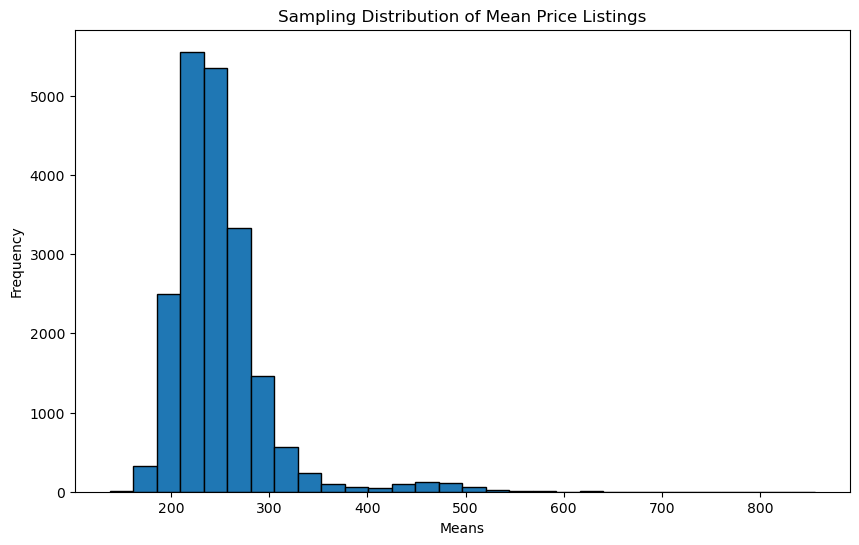

In [18]:
# Plot the histogram of the sampling distribution
plt.figure(figsize=(10, 6))
plt.hist(sample_estimates['sample_mean'], bins=30, edgecolor='black')


# Add titles and labels
plt.title('Sampling Distribution of Mean Price Listings')
plt.xlabel('Means')
plt.ylabel('Frequency')

# Show the plot
plt.show()


In [19]:
np.random.seed(1234)
one_sample = airbnb.sample(n=40)
one_sample['price'].mean()

219.85

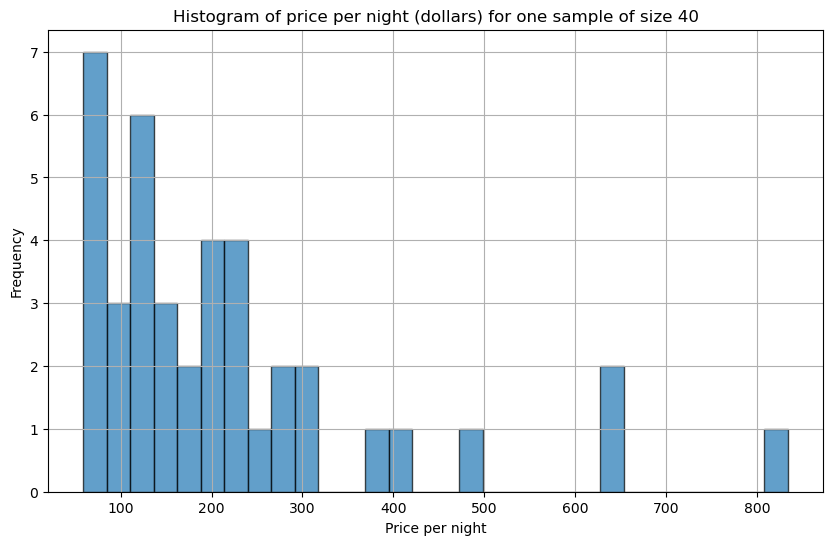

In [20]:
# Histogram of price per night (dollars) for one sample of size 40.
plt.figure(figsize=(10, 6))
plt.hist(one_sample['price'], bins=30, edgecolor='black', alpha=0.7)

# Add titles and labels
plt.title('Histogram of price per night (dollars) for one sample of size 40')
plt.xlabel('Price per night')
plt.ylabel('Frequency')

# Show the plot
plt.grid(True)
plt.show()

In [21]:
boot1 = one_sample.sample(frac = 1, replace = True)

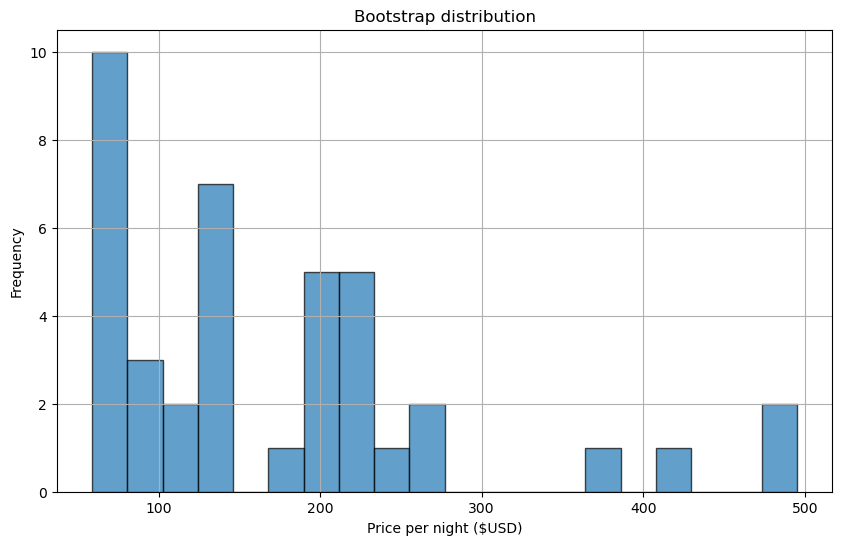

In [22]:
# Plot the histogram of the bootstrap distribution
plt.figure(figsize=(10, 6))
plt.hist(boot1['price'], bins=20, edgecolor='black', alpha=0.7)

# Add titles and labels
plt.title('Bootstrap distribution')
plt.xlabel('Price per night ($USD)')
plt.ylabel('Frequency')

# Show the plot
plt.grid(True)
plt.show()

In [24]:
bootstrap_samples = []
for i in range(20_000):
    sample = one_sample.sample(frac = 1, replace=True)
    sample = sample.assign(replicate = i)
    bootstrap_samples.append(sample)

boot2000 = pd.concat(bootstrap_samples)

In [25]:
boot_means = boot2000.groupby("replicate")["price"].mean().reset_index(name="mean_price")
boot_means

,replicate,mean_price
0,0,221.500
1,1,217.450
2,2,232.525
3,3,239.075
4,4,255.750
...,...,...
19995,19995,237.275
19996,19996,209.400
19997,19997,216.400
19998,19998,195.425


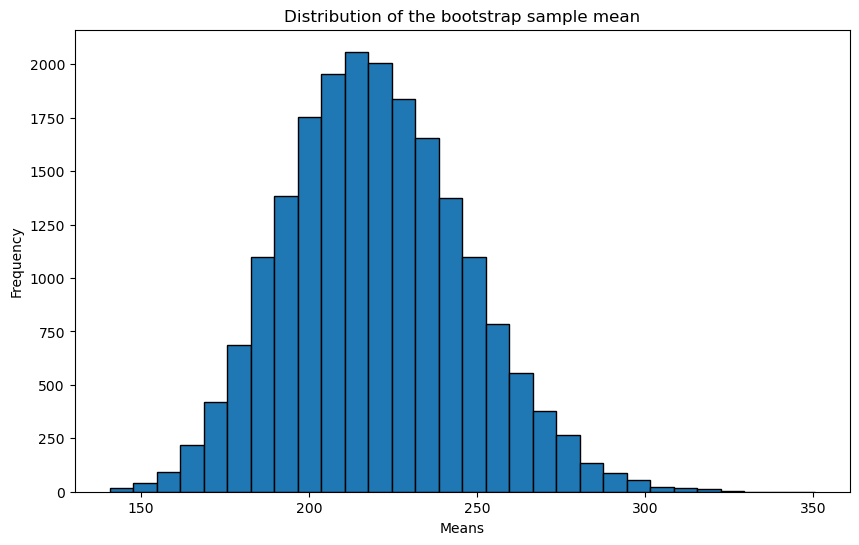

In [27]:
# Plot the histogram of the sampling distribution
plt.figure(figsize=(10, 6))
plt.hist(boot_means['mean_price'], bins=30, edgecolor='black')


# Add titles and labels
plt.title('Distribution of the bootstrap sample mean')
plt.xlabel('Means')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [28]:
ci_bounds = boot_means['mean_price'].quantile([0.025,0.975])
ci_bounds

0.025    171.449375
0.975    275.675625
Name: mean_price, dtype: float64